In [1]:
# import necessary data analysis  packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# model and feature engineering libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [6]:
# reading in the data sets, train and test 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
df = train.copy()

In [15]:
df.Training_score_average2 =np.log10(df.Training_score_average)

In [16]:
df.Training_score_average2.max()

1.9590413923210936

##  Slight Analysis 

In [4]:
df = train.copy()
df.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Trainings_Attended,38312.0,2.253680,0.609443,2.0,2.0,2.0,2.0,11.0
Year_of_birth,38312.0,1986.209334,7.646047,1950.0,1982.0,1988.0,1992.0,2001.0
Last_performance_score,38312.0,7.698959,3.744135,0.0,5.0,7.5,10.0,12.5
Year_of_recruitment,38312.0,2013.139695,4.261451,1982.0,2012.0,2014.0,2016.0,2018.0
Targets_met,38312.0,0.352996,0.477908,0.0,0.0,0.0,1.0,1.0
Previous_Award,38312.0,0.023152,0.150388,0.0,0.0,0.0,0.0,1.0
Training_score_average,38312.0,55.366465,13.362741,31.0,43.0,52.0,68.0,91.0
Promoted_or_Not,38312.0,0.084595,0.278282,0.0,0.0,0.0,0.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024EEB101780>,
      dtype=object)

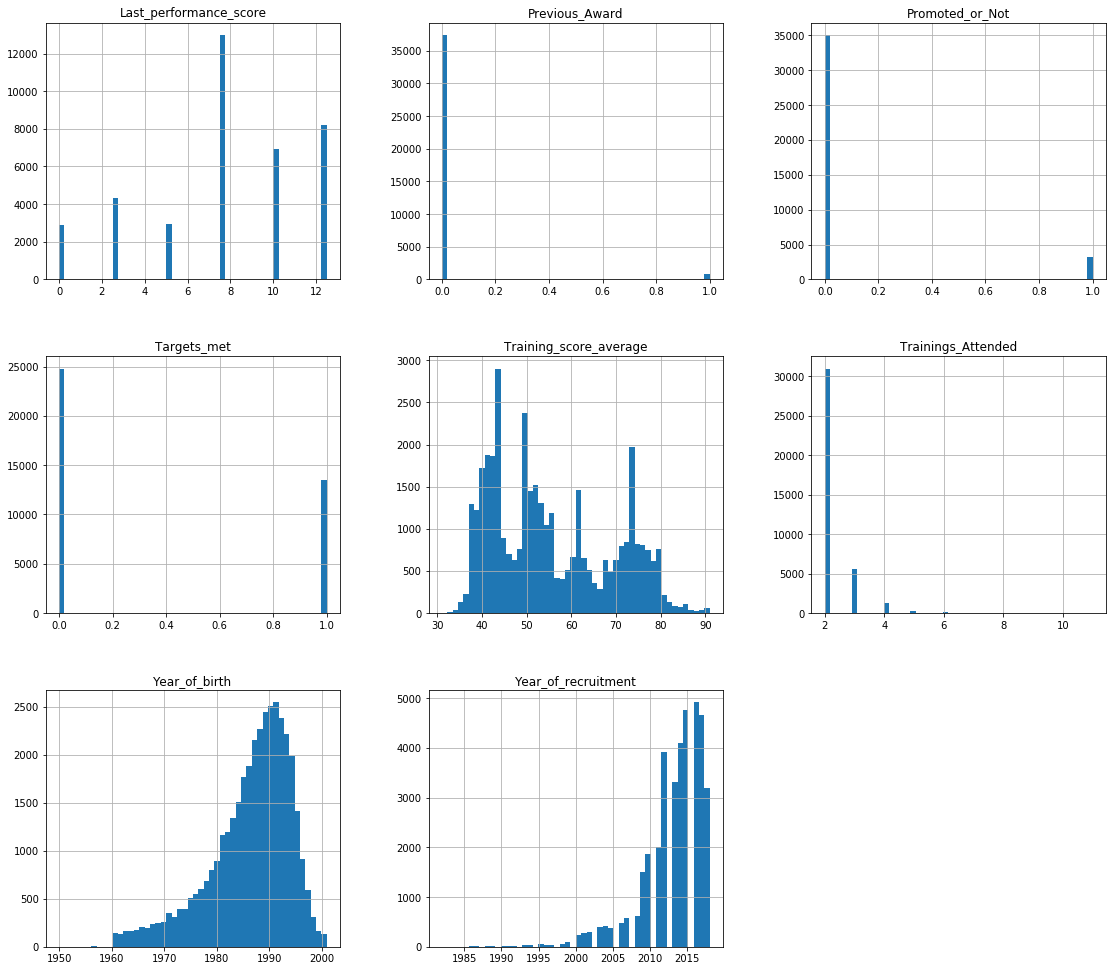

In [6]:
df.hist(bins = 50, figsize = (19, 17))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

##  In Depth Analysis

### the next couple of steps is to show number of values of various features also to ascertain which features can be combined to form new ones

In [8]:
# ascertain the number of unique categories per categorical feature in the dataset
for col_name in df.columns:
    if df[col_name].dtype == 'object':
        unique_len = len(df[col_name].unique())
        print('{} has {} number of unique values'.format(col_name, unique_len))

EmployeeNo has 38312 number of unique values
Division has 9 number of unique values
Qualification has 4 number of unique values
Gender has 2 number of unique values
Channel_of_Recruitment has 3 number of unique values
State_Of_Origin has 37 number of unique values
Foreign_schooled has 2 number of unique values
Marital_Status has 3 number of unique values
Past_Disciplinary_Action has 2 number of unique values
Previous_IntraDepartmental_Movement has 2 number of unique values
No_of_previous_employers has 7 number of unique values


In [9]:
# finding the values in each categorical feature
df.Division.value_counts()

Commercial Sales and Marketing                 11695
Customer Support and Field Operations           7973
Sourcing and Purchasing                         5052
Information Technology and Solution Support     4952
Information and Strategy                        3721
Business Finance Operations                     1786
People/HR Management                            1704
Regulatory and Legal services                    733
Research and Innovation                          696
Name: Division, dtype: int64

In [10]:
df.Qualification.value_counts()

First Degree or HND         25578
MSc, MBA and PhD            10469
Non-University Education      586
Name: Qualification, dtype: int64

In [11]:
print(df.Channel_of_Recruitment.value_counts())
print()
print(df.No_of_previous_employers.value_counts())
print()
print(df.Foreign_schooled.value_counts())

Agency and others                  21310
Direct Internal process            16194
Referral and Special candidates      808
Name: Channel_of_Recruitment, dtype: int64

1              18867
0              13272
2               1918
3               1587
4               1324
5                943
More than 5      401
Name: No_of_previous_employers, dtype: int64

Yes    34995
No      3317
Name: Foreign_schooled, dtype: int64


### the next couple of steps is to show number of values of various features also to ascertain which features can be combined to form new ones

In [12]:
# checking the number of values of the features, we'll just encode

print(df.Gender.value_counts())
print()
print(df.Marital_Status.value_counts())
print()
print(df.Previous_Award.value_counts())
print()
print(df.Previous_IntraDepartmental_Movement.value_counts())
print()
print(df.Past_Disciplinary_Action.value_counts())

Male      26880
Female    11432
Name: Gender, dtype: int64

Married     31022
Single       6927
Not_Sure      363
Name: Marital_Status, dtype: int64

0    37425
1      887
Name: Previous_Award, dtype: int64

No     34709
Yes     3603
Name: Previous_IntraDepartmental_Movement, dtype: int64

No     38161
Yes      151
Name: Past_Disciplinary_Action, dtype: int64


In [13]:
# the maximum and minimum years of recruitment of staff
print(df.Year_of_recruitment.max())
print(df.Year_of_recruitment.min())

2018
1982


In [14]:
# the number of values in the gender feature
print(df.Gender.value_counts())

Male      26880
Female    11432
Name: Gender, dtype: int64


In [15]:
df.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not'],
      dtype='object')

In [16]:
print(df.Trainings_Attended.value_counts())
# we see that very few people have attended trainings more than 5 times, so we can sum them up 

2     30981
3      5631
4      1244
5       316
6        93
7        28
8         6
10        5
11        4
9         4
Name: Trainings_Attended, dtype: int64


In [17]:
# check for missing values, Qualification has missing values
df.isnull().sum().sort_values()

EmployeeNo                                0
Previous_IntraDepartmental_Movement       0
Past_Disciplinary_Action                  0
Marital_Status                            0
Foreign_schooled                          0
State_Of_Origin                           0
Training_score_average                    0
Previous_Award                            0
No_of_previous_employers                  0
Targets_met                               0
Last_performance_score                    0
Year_of_birth                             0
Trainings_Attended                        0
Channel_of_Recruitment                    0
Gender                                    0
Division                                  0
Year_of_recruitment                       0
Promoted_or_Not                           0
Qualification                          1679
dtype: int64

In [18]:
# since, Non university Education has the lowest count, we can fill it in the missing values fields
df.Qualification = df.Qualification.fillna('Non-University Education')

In [19]:
df.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not'],
      dtype='object')

In [31]:
df.Last_performance_score.head()

0    12.5
1    12.5
2     7.5
3     2.5
4     7.5
Name: Last_performance_score, dtype: float64

In [ ]:
df['performance_score_by_training_attended'] = df[]

In [24]:
df.Trainings_Attended.head()

0    2
1    2
2    2
3    3
4    3
Name: Trainings_Attended, dtype: int64

In [44]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

In [ ]:
lbl = LabelBinarizer()

In [46]:
df.Promoted_or_Not.value_counts()

0    35071
1     3241
Name: Promoted_or_Not, dtype: int64

In [50]:
qualification_to_number={'First Degree or HND':2, 'MSc, MBA and PhD':3, 'Non-University Education':1}

states_to_tribe={
    'ABIA': "IGBO",
    'ADAMAWA':"HAUSA",
    'AKWA IBOM':"IGBO",
    'ANAMBRA':"IGBO",
    'BAUCHI':"IGBO",
    'BAYELSA':"IGBO",
    'BENUE':"HAUSA",
    'BORNO':"HAUSA",
    'CROSS RIVER':"IGBO",
    'DELTA':"IGBO",
    'EBONYI':"IGBO",
    'EDO':"IGBO",
    'EKITI':"YORUBA",
    'ENUGU':"IGBO",
    'FCT':"HAUSA",
    'GOMBE':"HAUSA",
    'IMO':"IGBO",
    'JIGAWA':"HAUSA",
    'KADUNA':"HAUSA",
    'KANO':'HAUSA',
    'KATSINA':"HAUSA",
    'KEBBI':"HAUSA",
    'KOGI':"HAUSA",
    'KWARA':"HAUSA",
    "LAGOS":"YORUBA",
    'NASSARAWA':"HAUSA",
    'NIGER':"HAUSA",
     'OGUN':"YORUBA",
     'ONDO':"YORUBA",
     'OSUN':"YORUBA",
     'OYO':"YORUBA",
     'PLATEAU':"HAUSA",
     'RIVERS':"IGBO",
     'SOKOTO':"HAUSA",
     'TARABA':"HAUSA",
     'YOBE':"HAUSA",
     'ZAMFARA':"HAUSA"
    }

In [77]:
def age_classifier(year_of_birth):
    for x in year_of_birth.values:
        age_metric= 2018 - int(x)
    
    if age_metric < 21:
        return 'less than 21'
    elif age_metric >= 21 and age_metric <=35:
        return 'Young Adult'
    elif age_metric >= 36 and age_metric <= 65:
        return 'Adult workers'
    else:
        return "Retirees"

In [75]:
def experience_level(years_of_service.values):
    for x in years_of_service.values:
        exp_year = 2018 - int(x)
    
        if exp_year < 5:
            return "1-4"
        elif exp_year >= 5 and exp_year <= 10:
            return "5 -10"
        elif exp_year >= 11 and exp_year <= 15:
            return "11- 15"
        elif exp_year>= 16 and exp_year <= 20:
            return "16- 20"
        elif exp_year >= 21 and exp_year <= 25:
            return "21 - 25"
        else:
            return " > 26"


In [79]:
df1 = df.copy()

In [81]:
df1['year_class'] = experience_level(df1.Year_of_recruitment)

In [82]:
df1.year_class.value_counts()

1-4    38312
Name: year_class, dtype: int64

In [83]:
df1.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not', 'year class', 'year_class'],
      dtype='object')

In [84]:
df1['Age_classification'] = age_classifier(df1.Year_of_birth)

In [85]:
df1.Age_classification.value_counts()

Young Adult    38312
Name: Age_classification, dtype: int64